# Credit Scoring - Mercado Financeiro

In [1]:
import pandas as pd
import numpy as np

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'

In [3]:
dados = pd.read_csv(uri)

In [4]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [6]:
duplicados = dados.duplicated()
duplicados = duplicados.sum()

print(f'A base de dados tem {duplicados} dados duplicados.')

A base de dados tem 0 dados duplicados.


In [7]:
nulos = dados.isnull()
nulos.sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [8]:
y = dados['default']
x = dados.drop(columns='default')

In [9]:
from sklearn.model_selection import train_test_split

SEED = 77

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size=0.3,
                                                        random_state=SEED)

In [10]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print(f'A base de treino tem {base_treino} elementos, e a base de teste tem {base_teste} elementos.')

A base de treino tem 700 elementos, e a base de teste tem 300 elementos.


# Transformando variaveis

In [11]:
dados['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

Dentro da variavel categórica 'conta_corrente' encontramos 4 valores. Vamos substituí-los por 4 'etiquetas'.

In [12]:
#mudando categoria variavel 'conta_corrente'

a = {'< 0 DM' : 1,
     '0 <= ... < 200 DM' : 2,
     'no checking account' : 3,
     '>= 200 DM / salary assignments for at least 1 year' : 4
}

dados['conta_corrente'] = dados['conta_corrente'].map(a)

In [13]:
#mudando categoria variavel 'historico_credito'

a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5     
}
dados['historico_credito'] = dados['historico_credito'].map(a)

In [14]:
#mudando categoria variavel 'proposito_emprestimo'

a = { 'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
}
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(a)

In [15]:
#mudando categoria variavel 'reserva_cc'

a = { 'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5     
}
dados['reserva_cc'] = dados['reserva_cc'].map(a)

In [16]:
#mudando categoria variavel 'tempo_emprego_atual'

a = { '.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5     
}
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(a)

In [17]:
#mudando categoria variavel 'sexo_est_civil'

a = { 'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5     
}
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(a)

In [18]:
#mudando categoria variavel 'outros_fiadores'

a = { 'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3    
}
dados['outros_fiadores'] = dados['outros_fiadores'].map(a)

In [19]:
#mudando categoria variavel 'propriedade'

a = { 'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4 
}
dados['propriedade'] = dados['propriedade'].map(a)

In [20]:
#mudando categoria variavel 'outros_planos_financiamento'

a = { 'bank' : 1,
      'stores' : 2,
      'none' : 3 
}

dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(a)

In [21]:
#mudando categoria variavel 'tipo_residencia'

a = { 'rent' : 1,
      'own' : 2,
      'for free' : 3 
}

dados['tipo_residencia'] = dados['tipo_residencia'].map(a)

In [22]:
#mudando categoria variavel 'status_emprego'

a = { 'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
}
dados['status_emprego'] = dados['status_emprego'].map(a)

In [23]:
#mudando categoria variavel 'telefone'

a = { 'yes, registered under the customers name ' : 1,
      'none' : 0
}
dados['telefone'] = dados['telefone'].map(a)

In [24]:
#mudando categoria variavel 'trabalhador_estrangeiro'

a = { 'yes' : 1,
      'no' : 0
}
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(a)

# ML

In [25]:
y = dados['default']
x = dados.drop(columns = 'default')

In [26]:
from sklearn.linear_model import LogisticRegression

SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state=SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


In [27]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)
print(modelo.score(treino_x, treino_y))

0.7428571428571429


# Explorando métricas

## Acurácia

In [28]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)
acuracia.round(4) * 100

79.33

## Matriz de confusão

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

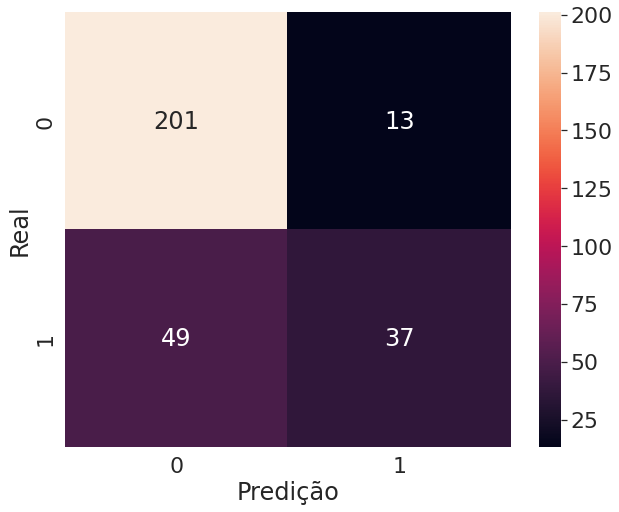

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

matriz_confusao = confusion_matrix(teste_y, previsoes)

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")

Nós temos 201 ocorrências no quadrante de verdadeiros positivos, nós temos 13 ocorrências no quadrante de falsos positivos, nós temos 49 ocorrências no quadrante de falsos negativos e temos 37 ocorrências no quadrante de verdadeiros negativos. Isso significa que o nosso modelo teve 201 mais 37 predições corretas, ou seja, 238 predições corretas versus 62 predições erradas, ou seja, 49 mais 13.

## Classification Report

In [31]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       214
           1       0.74      0.43      0.54        86

    accuracy                           0.79       300
   macro avg       0.77      0.68      0.71       300
weighted avg       0.79      0.79      0.77       300



## Curva ROC

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)
prob_previsao

array([[0.87090369, 0.12909631],
       [0.59954355, 0.40045645],
       [0.7295339 , 0.2704661 ],
       [0.37440537, 0.62559463],
       [0.74229917, 0.25770083],
       [0.93732358, 0.06267642],
       [0.31404686, 0.68595314],
       [0.52716829, 0.47283171],
       [0.68502357, 0.31497643],
       [0.64316237, 0.35683763],
       [0.87740968, 0.12259032],
       [0.86281225, 0.13718775],
       [0.90570431, 0.09429569],
       [0.84709221, 0.15290779],
       [0.56401295, 0.43598705],
       [0.64718141, 0.35281859],
       [0.87857941, 0.12142059],
       [0.87621199, 0.12378801],
       [0.83801849, 0.16198151],
       [0.64530694, 0.35469306],
       [0.81669299, 0.18330701],
       [0.66547714, 0.33452286],
       [0.67042757, 0.32957243],
       [0.53047575, 0.46952425],
       [0.76206251, 0.23793749],
       [0.85821122, 0.14178878],
       [0.84528004, 0.15471996],
       [0.59433433, 0.40566567],
       [0.79126569, 0.20873431],
       [0.94195225, 0.05804775],
       [0.

Ele trouxe aqui um monte de coisa. Mas o que são essas coisas? É um array cheio de matrizes. Ele nos traz aqui um par, que serão as matrizes 1x2, então um par, na outra linha outro par, e assim por diante. O que são esses pares? É a probabilidade do meu evento ser predito como 1 ou como 0. Isso será importante e será necessário como argumento para calcular a nossa curva ROC.

roc_auc 0.8042273418821995


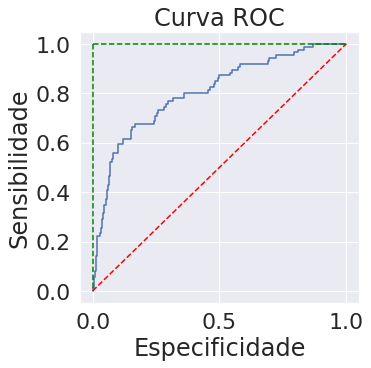

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:,1]

# tfp = taxa de falsos positivos
# tvp = taxa de verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

# matplotlib para o grafico
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')

# linhas guia para avaliação da curva
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde

plt.show()





### Entendendo a curva ROC

Avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (especificidade) para diferentes limites.



```
Especificidade = VN / (VN + FP)

Sensibilidade = VP (VP + FN)
```



Se vocês observarem bem, a minha sensibilidade tem a mesma representação matemática do recall, então é um outro nome para o recall. O que significam essas duas métricas? A sensibilidade indica a taxa de casos em que a categoria alvo, ou seja, a categoria 1, foi classificada corretamente.

 Já a especificidade mede a taxa em que a categoria 0 foi, de maneira errada, classificada como 1. Vamos voltar para o nosso gráfico, agora que já sabemos o que significam essas duas coisas e vamos ver o que buscamos nesse gráfico.

Pensando aqui, a nossa linha vermelha, que é aquela diagonal do gráfico, ela vai representar um modelo completamente aleatório.

Já a minha linha verde, que é aquela linha guia que vem pela esquerda e sobe na parte superior do gráfico, indica um modelo perfeito. Ou seja, todas as predições que o meu modelo faz estão corretas. Como sabemos que ter um modelo perfeito ou ter um modelo aleatório é muito difícil, a nossa curva ROC estará sempre entre essas duas linhas guias aqui.

Como vocês podem ver, a linha azul, que é a curva ROC, ela está no meio do verde e do vermelho. E o que nós buscamos neste gráfico? Nós buscamos o mais próximo da linha verde possível. Nós queremos que a nossa curva ROC esteja mais próxima do canto superior esquerdo. Por que buscamos isso?

Porque ele vai maximizar a minha taxa de verdadeiros positivos e vai minimizar a minha taxa de falsos positivos. É isso o que nós encontramos, que buscamos esse trade-off entre verdadeiros positivos e falsos positivos, nós queremos maximizar um enquanto minimizamos o outro consequentemente.

Mas para quantificar essa curva nós usamos a área sob a curva ROC, que também é conhecida como AUC. O que o AUC nos diz? O AUC quantifica a curva ROC. Ou seja, através da área sob a curva, ele me diz o quão bom está o nosso gráfico. Tem uma convenção estatística para decidir se temos uma boa curva ROC ou uma curva ROC mais ou menos.



```
AUC

Quantifica a Curva ROC através da área sob esta curva

Convenção Estatística:

área < 0,7: baixa discriminiação
0,7 ≤ área < 0,8: discriminação aceitável
0,8 ≤ área < 0,9: discriminação excelente
área > 0,9: discriminação excepcional
```



In [34]:
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

roc_auc 0.8042273418821995


## Análise Descritiva

In [35]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
dados[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.68200,35.546000,20.903000,3271.258000,0.300000
std,0.70808,11.375469,12.058814,2822.736876,0.458487
min,1.00000,19.000000,4.000000,250.000000,0.000000
25%,2.00000,27.000000,12.000000,1365.500000,0.000000
50%,3.00000,33.000000,18.000000,2319.500000,0.000000
75%,3.00000,42.000000,24.000000,3972.250000,1.000000
max,4.00000,75.000000,72.000000,18424.000000,1.000000


In [36]:
# homem = categorias 1, 3, 4
# mulher = categorias 2, 5

dados['sexo_est_civil'].value_counts()

# temos 310 mulheres
# 690 homens

3    548
2    310
4     92
1     50
Name: sexo_est_civil, dtype: int64

In [37]:
dados['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

In [38]:
# base desbalanceada

## Histogramas

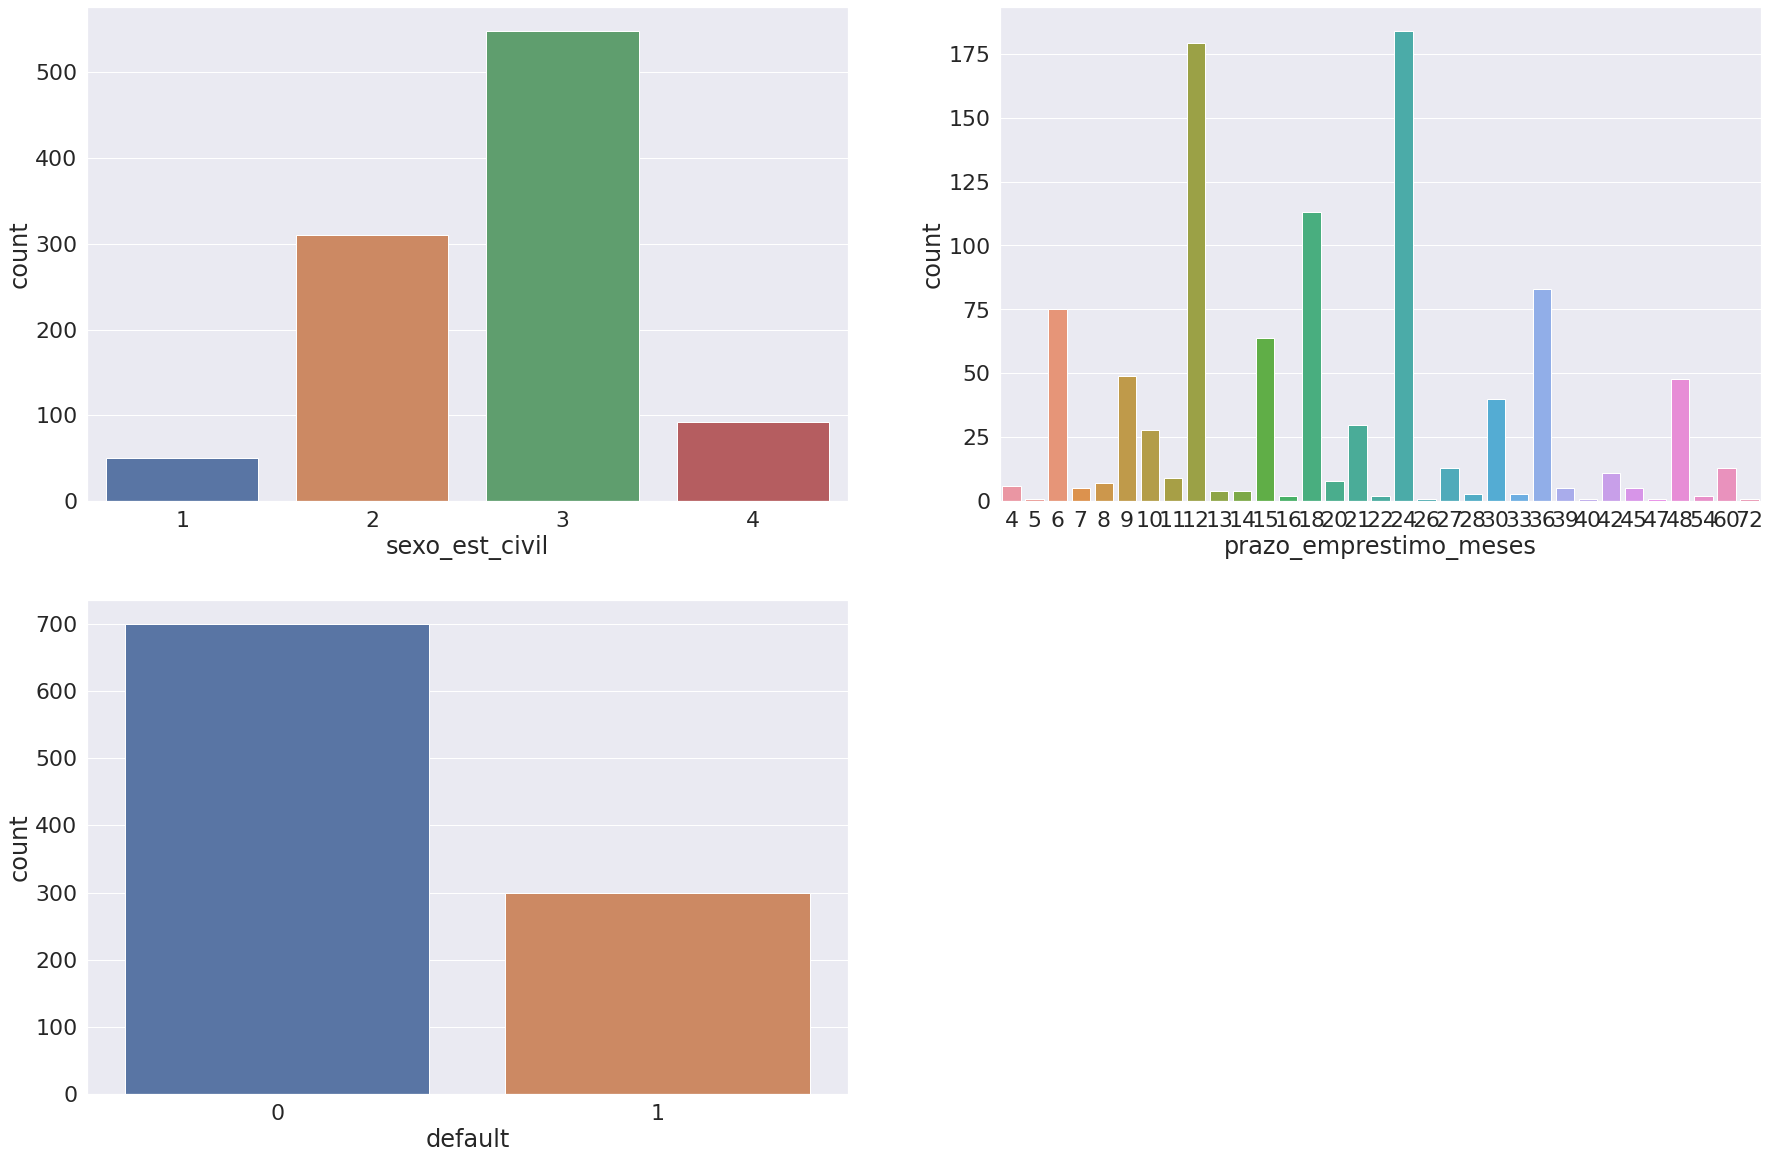

In [39]:
import seaborn as sns

histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize = (30,20))

for i in lista_histogramas:
  plt.subplot(2, 2, i[0]+1)
  sns.countplot(x = i[1], data = dados)

## Boxplot e grafico de barras

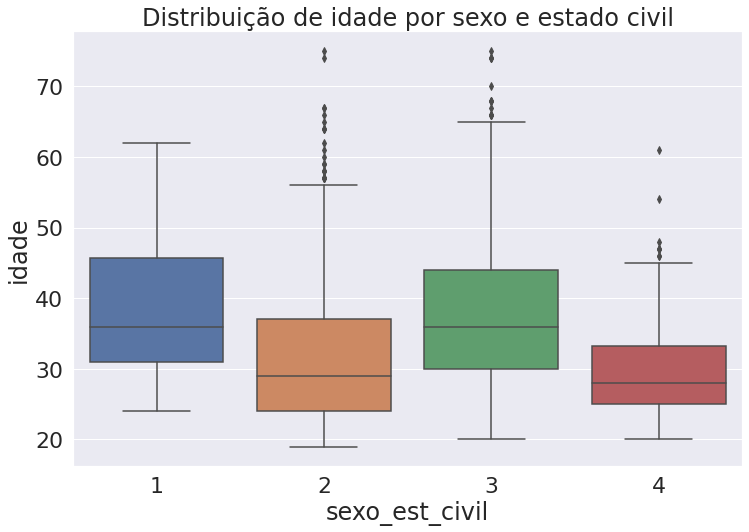

In [40]:
plt.figure(figsize = (12, 8))

sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = dados)
plt.title('Distribuição de idade por sexo e estado civil')

plt.show()

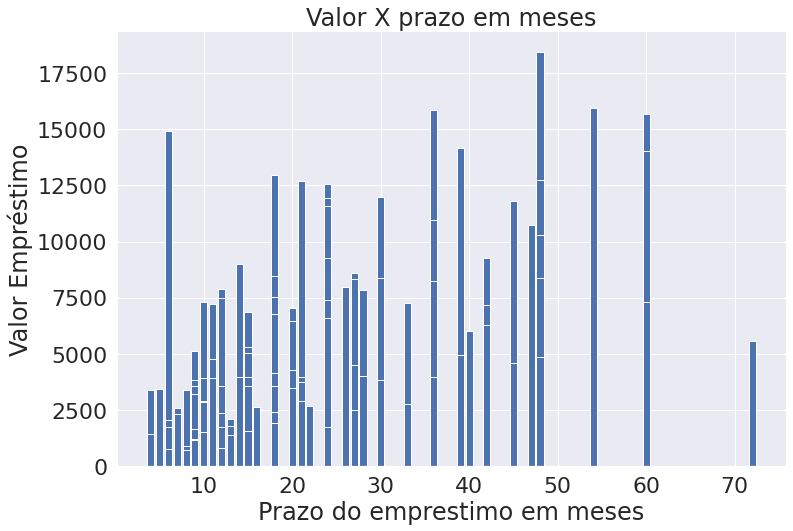

In [41]:
plt.figure(figsize = (12, 8))

plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)

plt.xlabel('Prazo do emprestimo em meses')
plt.ylabel('Valor Empréstimo')
plt.title('Valor X prazo em meses')

plt.show()

# Separação de Variáveis

O que nós consideramos aqui, no Brasil, o que o Banco Central considera uma informação sensível? Origem social e étnica, condições de saúde, informação genética, orientação sexual, convicções políticas, religiosas e filosóficas.

Separaremos a variavel 'sexo_est_civil' em duas variaveis indepententes:

In [42]:
dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

# Função para rodar o modelo

In [43]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

def roda_modelo(base_dados, classificador):

  y = base_dados['default']
  x = base_dados.drop(columns='default')

  SEED = 77

  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3, random_state = SEED)

  base_treino = treino_x.shape[0]
  base_teste = teste_x.shape[0]
  
  print(f'Total elementos para treino = {base_treino}.')
  print(f'Total elementos para teste = {base_teste}.')
  print('-' * 50)

  modelo = classificador
  modelo.fit(treino_x, treino_y)

  previsoes = modelo.predict(teste_x)

  matriz_confusao = confusion_matrix(teste_y, previsoes)

  plt.figure(figsize = (6, 6))
  plt.title('Matriz de Confusão')
  # sns.set(font_scale = 2)
  ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
  ax.set(xlabel = "Predição", ylabel = "Real")

  

  print('*Classification Report*')
  print(classification_report(teste_y, previsoes))

  print('Curva ROC e AUC')
  prob_previsao = modelo.predict_proba(teste_x)[:,1]

  tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
  print('roc_auc', roc_auc_score(teste_y, prob_previsao))

  # matplotlib para o grafico
  plt.subplots(1, figsize=(6,6))
  plt.title('Curva ROC')
  plt.plot(tfp, tvp)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')

  # linhas guia para avaliação da curva
  plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
  plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde

  # plt.show()

  return modelo, matriz_confusao

Total elementos para treino = 700.
Total elementos para teste = 300.
--------------------------------------------------
*Classification Report*
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       214
           1       0.73      0.44      0.55        86

    accuracy                           0.79       300
   macro avg       0.77      0.69      0.71       300
weighted avg       0.78      0.79      0.78       300

Curva ROC e AUC
roc_auc 0.8025972614648988


(LogisticRegression(max_iter=1000), array([[200,  14],
        [ 48,  38]]))

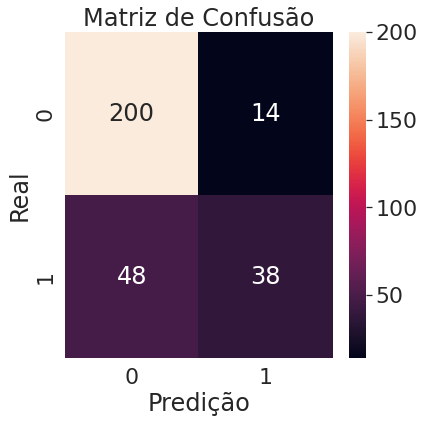

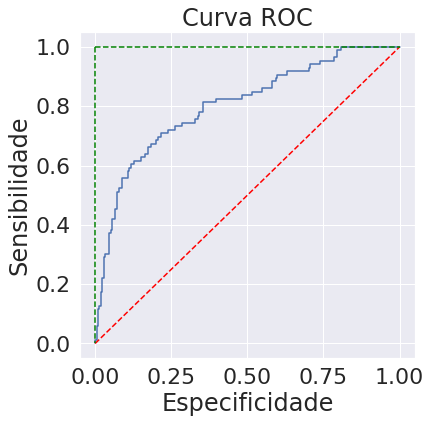

In [44]:
roda_modelo(dados, LogisticRegression(max_iter=1000))

In [45]:
# meio merda o print acima mas vou deixar passar

# Faixas de classificação

In [46]:
# repartindo idade em faixas

dados['faixa_idade'] = pd.cut(x = dados['idade'],
                              bins = [18, 30, 40, 50, 60, 70, 80],
                              labels = [1, 2, 3, 4, 5, 6])

In [47]:
# repartindo 'prazo_emprestimo'

dados['faixa_prazo_emprestimo'] = pd.cut(x = dados['prazo_emprestimo_meses'],
                                         bins = [1, 12, 24, 36, 48, 60, 72],
                                         labels = [1, 2, 3, 4, 5, 6])

In [48]:
# repartindo valor_emprestimo

dados['faixa_valor_emprestimo'] = pd.cut(x = dados['valor_emprestimo'],
                                         bins = [1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000],
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [49]:
# retirando colunas

colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns = colunas_retiradas)

Total elementos para treino = 700.
Total elementos para teste = 300.
--------------------------------------------------
*Classification Report*
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       214
           1       0.73      0.44      0.55        86

    accuracy                           0.79       300
   macro avg       0.77      0.69      0.71       300
weighted avg       0.78      0.79      0.78       300

Curva ROC e AUC
roc_auc 0.7864594653336232


(LogisticRegression(max_iter=1000), array([[200,  14],
        [ 48,  38]]))

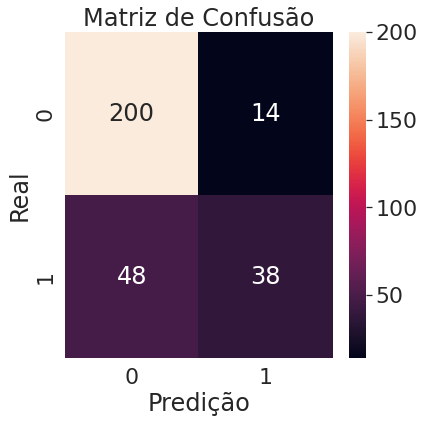

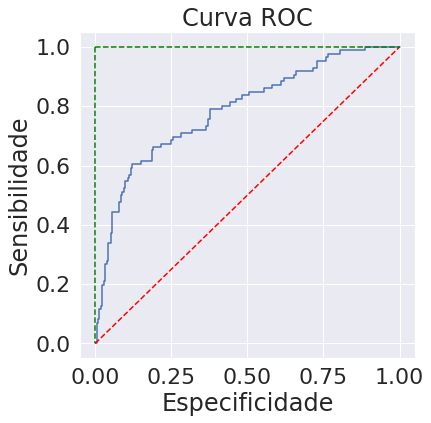

In [50]:
roda_modelo(base_dados, LogisticRegression(max_iter = 1000))

In [51]:
base_dados.sample(50)

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
96,0,3,5,8,1,2,4,1,2,3,...,2,1,3,1,0,1,0,5,1,3
854,0,3,4,1,5,1,2,1,2,3,...,2,2,3,2,1,1,1,3,3,11
39,0,2,3,5,5,3,4,1,3,1,...,2,1,3,1,0,1,1,1,1,1
885,1,1,3,8,5,4,4,1,4,2,...,2,1,3,1,0,1,0,4,1,1
152,0,4,3,5,5,3,4,1,1,3,...,2,1,3,1,0,1,1,1,3,6
278,1,3,3,4,5,4,1,1,4,2,...,2,1,3,1,0,1,0,2,1,5
900,1,1,5,1,5,1,2,3,4,2,...,1,1,3,1,1,1,1,3,2,3
157,0,1,2,9,5,1,4,1,1,3,...,2,1,2,1,0,1,0,3,1,1
934,0,1,3,5,5,3,4,1,1,3,...,2,1,3,1,0,1,0,1,1,2
501,0,1,3,2,5,1,2,1,4,4,...,3,1,3,2,0,1,1,3,3,6


In [52]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   default                      1000 non-null   int64   
 1   conta_corrente               1000 non-null   int64   
 2   historico_credito            1000 non-null   int64   
 3   proposito_emprestimo         1000 non-null   int64   
 4   reserva_cc                   1000 non-null   int64   
 5   tempo_emprego_atual          1000 non-null   int64   
 6   taxa_comp_salario            1000 non-null   int64   
 7   outros_fiadores              1000 non-null   int64   
 8   anos_residencia_atual        1000 non-null   int64   
 9   propriedade                  1000 non-null   int64   
 10  outros_planos_financiamento  1000 non-null   int64   
 11  tipo_residencia              1000 non-null   int64   
 12  n_creditos_banco             1000 non-null   int64   
 13  stat